In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the train and test CSV files
train = pd.read_csv('/content/drive/My Drive/train.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')
train=train[['text','ptext','index','label']]
test=test[['text','ptext','index','label']]
# Extract features (X) and labels (y) for train and test datasets
X_train = train[['text', 'ptext']]
y_train = train['label']

X_test = test[['text', 'ptext']]
y_test = test['label']


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'data' with a 'label_index' column containing label indices

# Split the data into training and test sets with stratified sampling
#X_training, X_validation, y_training, y_validation = train_test_split(
#    train[['text','ptext','index']],  # Features (TF-IDF vectors)
#    train[['label','index']],      # Target variable (label indices)
#    test_size=0.2,
#    stratify=train['label'],  # Ensure stratified sampling based on label indices
#    random_state=48  # Set a random seed for reproducibility
#)

# Merge X_train and y_train into the train DataFrame based on 'index' column
#training = X_training.merge(y_training )

# Merge X_test and y_test into the test DataFrame based on 'index' column
#valid = X_validation.merge(y_validation)

# Now, the 'train' and 'test' DataFrames are merged based on the 'index' column
#training.to_csv('/content/drive/MyDrive/training.csv')
#valid.to_csv('/content/drive/MyDrive/validation.csv')


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have already renamed the "medical_specialty" column to "label"

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder to your unique labels and transform the "label" column

# Load the train and test CSV files
train = pd.read_csv('/content/drive/My Drive/training.csv')
valid=pd.read_csv('/content/drive/My Drive/validation.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')
# List of categories
categories = [
    "Surgery",
    "Consult - History and Phy.",
    "Cardiovascular / Pulmonary",
    "Orthopedic",
    "Radiology",
    "General Medicine",
    "Gastroenterology",
    "Neurology",
    "SOAP / Chart / Progress Notes",
    "Obstetrics / Gynecology",
    "Urology",
    "Discharge Summary"
]
specialty_numbers=[38, 5, 3, 27, 33, 15, 14, 22, 35, 24, 39, 10]
# Iterate through the 'label' column of train, test, and valid dataframes
for df in [train, test, valid]:
    df['label'] = df['label'].apply(lambda x: x if x in specialty_numbers else 40)
    df['label'] = label_encoder.fit_transform(df['label'])


# Now, the 'label' column in train, test, and valid contains only values in 'categories' or 'others'

train=train[['text','ptext','index','label']]
valid=valid[['text','ptext','index','label']]
test=test[['text','ptext','index','label']]
# Extract features (X) and labels (y) for train and test datasets
X_train = train[['text', 'ptext']]
y_train = train['label']

X_valid=valid[['text', 'ptext']]
y_valid = valid['label']

X_test = test[['text', 'ptext']]
y_test = test['label']


In [5]:
specialty_counts = test['label'].value_counts()
(specialty_counts)

10    218
12    214
1     103
0      74
7      71
8      55
4      52
3      45
5      45
9      33
6      31
11     31
2      22
Name: label, dtype: int64

In [7]:
len(specialty_counts)

13

# without preproccessing

In [8]:
from gensim.models import Word2Vec

# Combine all the sentences from the 'article1' and 'summary1' columns
train_sentences = X_train['text'].tolist()
# Convert the sentences to lists of words
train_sentences = [sentence.split() for sentence in train_sentences]

# Create a Word2Vec model
model = Word2Vec(train_sentences, vector_size=300, window=5, min_count=1, workers=4)

# Train the model
model.train(train_sentences, total_examples=model.corpus_count, epochs=30)

# Save the model
#model.save("word2vec.model")

(34970382, 44241360)

In [9]:
vocab_size = len(model.wv.key_to_index)

print(len(model.wv.key_to_index))

64594


In [10]:

from tensorflow.keras.preprocessing.text import Tokenizer

oov_tok='<oov>'
oov_token=oov_tok
tokenizer = Tokenizer(oov_token=oov_tok)#,num_words = vocab_size)
#tokenizer = Tokenizer(num_words = vocab_size)

tokenizer.fit_on_texts(X_train['text'])
print(len(list(tokenizer.word_index.keys())))


21406


In [11]:
X_train['text_indices'] = tokenizer.texts_to_sequences(X_train['text'])
sequences = tokenizer.texts_to_sequences(X_train['text'])

word_index = tokenizer.word_index


<ipython-input-11-bac10b2cb6b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['text_indices'] = tokenizer.texts_to_sequences(X_train['text'])


In [12]:
len(X_train['text'][0])

1653

In [13]:
len(sequences[0])

278

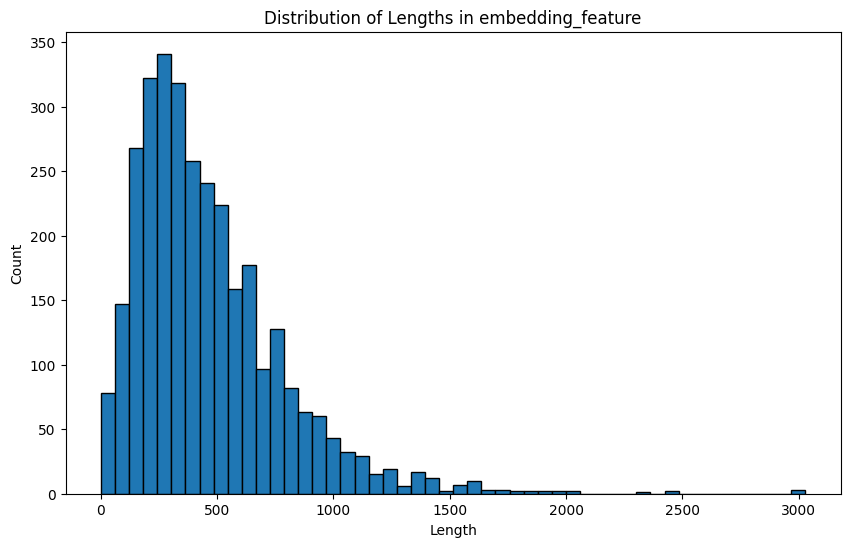

In [14]:
import matplotlib.pyplot as plt

lengths = [len(text.split()) for text in X_train['text']]
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=50, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Lengths in embedding_feature')
plt.show()

In [15]:
import numpy as np

# Calculate the mean of lengths
mean_length = np.mean(lengths)

# Calculate the quartiles (25th, 50th, and 75th percentiles)
quartiles = np.percentile(lengths, [25, 50, 75])

print("Mean Length:", mean_length)
print("25th Percentile (1st Quartile):", quartiles[0])
print("50th Percentile (Median):", quartiles[1])
print("75th Percentile (3rd Quartile):", quartiles[2])


Mean Length: 464.1838212149827
25th Percentile (1st Quartile): 241.0
50th Percentile (Median): 393.0
75th Percentile (3rd Quartile): 614.0


In [16]:
word_vectors = model.wv
vocab_size = len(word_vectors.key_to_index)
num_words=len(word_vectors.key_to_index)

embedding_dim = model.vector_size
print(embedding_dim)


300


In [17]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#padding_type = 'post'  # Pad sequences at the end
#truncating_type = 'post'  # Truncate sequences at the end
#max_length = 200
# Padding sequences
#padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)


In [ ]:
#X_test['text_indices'] = tokenizer.texts_to_sequences(X_test['text'])
#test_sequences = tokenizer.texts_to_sequences(X_test['text'])
#test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)


# main model

In [18]:
from keras.layers import Input, Embedding, LSTM, Dense, Bidirectional
from keras.models import Model
# encoder input model
max_length = 512
inputs = Input(shape=(max_length,))
#encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim)(inputs)
encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[word_vectors.vectors], trainable=False)(inputs)
encoder2 = LSTM(128, return_sequences=True)(encoder1)  # Add return_sequences=True
# Bidirectional LSTM layer
encoder2_bilstm = Bidirectional(LSTM(64))(encoder2)

#outputs= Dense(5, activation='softmax')
# Define output layers for each sentiment column
output_layers = []
x=13
output_layer1 = Dense(32, activation='relu')(encoder2_bilstm)
#output_layer2 = Dense(16, activation='relu')(output_layer1)
output_layer = Dense(x, activation='softmax')(output_layer1)
#output_layer = Dense(x, activation='softmax', name=col)(encoder2_bilstm) #label_encoder.classes_.shape[0]
output_layers.append(output_layer)

# Tie it together
model = Model(inputs=inputs, outputs=output_layers)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                                 
 embedding (Embedding)       (None, 512, 300)          19378200  
                                                                 
 lstm (LSTM)                 (None, 512, 128)          219648    
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 13)                429       
                                                             

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Convert your text data to sequences and pad them
padding_type = 'post'  # Pad sequences at the end
truncating_type = 'post'  # Truncate sequences at the end
# Padding sequences
# Assuming you have already defined a tokenizer
input_column="text"
train_sequences = tokenizer.texts_to_sequences(X_train[input_column])
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
test_sequences = tokenizer.texts_to_sequences(X_test[input_column])
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
valid_sequences = tokenizer.texts_to_sequences(X_valid[input_column])
valid_padded_sequences = pad_sequences(valid_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)


In [21]:
# Train the model
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the EarlyStopping callback
history = model.fit(train_padded_sequences, y_train,
                    epochs=100, batch_size=512, validation_data=(valid_padded_sequences, y_valid),#validation_split=0.20,
                    callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(test_padded_sequences, y_test)



Epoch 1/100
7/7 [==============================] - 14s 447ms/step - loss: 2.4258 - accuracy: 0.2320 - val_loss: 2.2451 - val_accuracy: 0.3119
Epoch 2/100
7/7 [==============================] - 2s 239ms/step - loss: 2.1729 - accuracy: 0.3176 - val_loss: 2.1004 - val_accuracy: 0.3157
Epoch 3/100
7/7 [==============================] - 2s 241ms/step - loss: 2.0369 - accuracy: 0.3349 - val_loss: 2.0047 - val_accuracy: 0.3522
Epoch 4/100
7/7 [==============================] - 2s 243ms/step - loss: 1.9393 - accuracy: 0.3598 - val_loss: 1.9453 - val_accuracy: 0.3736
Epoch 5/100
7/7 [==============================] - 2s 246ms/step - loss: 1.8666 - accuracy: 0.3783 - val_loss: 1.8991 - val_accuracy: 0.3673
Epoch 6/100
7/7 [==============================] - 2s 248ms/step - loss: 1.7939 - accuracy: 0.3941 - val_loss: 1.8654 - val_accuracy: 0.3547
Epoch 7/100
7/7 [==============================] - 2s 248ms/step - loss: 1.7222 - accuracy: 0.4001 - val_loss: 1.8307 - val_accuracy: 0.3484
Epoch 8/100


In [22]:
print(results)

[1.7891067266464233, 0.3531187176704407]


In [23]:
# Get predictions from the model
test_probabilities = model.predict(test_padded_sequences)

# Find the predicted class labels using argmax
test_predictions = test_probabilities.argmax(axis=1)

# Create a DataFrame with a single column for predictions
test_predictions_df = pd.DataFrame({'predictions': test_predictions})

# Save the DataFrame to a CSV file
test_predictions_df.to_csv('/content/drive/MyDrive/bilstm_r.csv', index=False)


32/32 [==============================] - 2s 27ms/step


# new model

In [25]:
from keras.layers import Input, Embedding, LSTM, Dense, Bidirectional, Conv1D, GlobalMaxPooling1D, Dropout, BatchNormalization
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np

# Define input shape and embedding layer as you did before
max_length = 512

inputs = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[word_vectors.vectors], trainable=False)(inputs)

# Apply LSTM layer with L2 regularization
lstm_layer = LSTM(512, return_sequences=True, kernel_regularizer=l2(0.01))(embedding_layer)

# Convolutional layer with batch normalization
conv1d_layer = Conv1D(filters=128, kernel_size=3, activation='relu')(lstm_layer)
conv1d_layer = BatchNormalization()(conv1d_layer)

# Global max pooling layer
global_max_pooling = GlobalMaxPooling1D()(conv1d_layer)

# Apply dropout after global max pooling
dropout_rate = 0.5
dropout_layer = Dropout(dropout_rate)(global_max_pooling)

# Bidirectional LSTM layer
bilstm_layer = Bidirectional(LSTM(256))(lstm_layer)

# Define output layers for each sentiment column
output_layers = []
num_classes = 13  # Replace with the actual number of classes

output_layer1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(dropout_layer)
output_layer2 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(output_layer1)
output_layer = Dense(num_classes, activation='softmax')(output_layer2)
output_layers.append(output_layer)

# Create the model
model = Model(inputs=inputs, outputs=output_layers)


# Print the model summary
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 512)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 512, 300)          19378200  
                                                                 
 lstm_8 (LSTM)               (None, 512, 512)          1665024   
                                                                 
 conv1d_2 (Conv1D)           (None, 510, 128)          196736    
                                                                 
 batch_normalization_2 (Bat  (None, 510, 128)          512       
 chNormalization)                                                
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                         

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

# Train the model with the EarlyStopping callback
history = model.fit(train_padded_sequences, y_train,
                    epochs=100, batch_size=512, validation_data=(valid_padded_sequences, y_valid),#validation_split=0.20,
                    callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(test_padded_sequences, y_test)



Epoch 1/100
7/7 [==============================] - 16s 1s/step - loss: 11.7465 - accuracy: 0.1416 - val_loss: 9.8423 - val_accuracy: 0.0742
Epoch 2/100
7/7 [==============================] - 8s 1s/step - loss: 9.4716 - accuracy: 0.1970 - val_loss: 9.1139 - val_accuracy: 0.2164
Epoch 3/100
7/7 [==============================] - 8s 1s/step - loss: 8.8301 - accuracy: 0.2304 - val_loss: 8.5122 - val_accuracy: 0.2164
Epoch 4/100
7/7 [==============================] - 8s 1s/step - loss: 8.2649 - accuracy: 0.2751 - val_loss: 7.9229 - val_accuracy: 0.2164
Epoch 5/100
7/7 [==============================] - 8s 1s/step - loss: 7.6890 - accuracy: 0.2663 - val_loss: 7.3899 - val_accuracy: 0.2704
Epoch 6/100
7/7 [==============================] - 8s 1s/step - loss: 7.1822 - accuracy: 0.2606 - val_loss: 6.9121 - val_accuracy: 0.2340
Epoch 7/100
7/7 [==============================] - 8s 1s/step - loss: 6.6720 - accuracy: 0.2896 - val_loss: 6.4794 - val_accuracy: 0.2352
Epoch 8/100
7/7 [===============

In [28]:
print(results)

[4.69083309173584, 0.3309859037399292]


# with preprocessing

In [ ]:
from gensim.models import Word2Vec

# Combine all the sentences from the 'article1' and 'summary1' columns
train_sentences = X_train['ptext'].tolist()
# Convert the sentences to lists of words
train_sentences = [sentence.split() for sentence in train_sentences]

# Create a Word2Vec model
model = Word2Vec(train_sentences, vector_size=300, window=5, min_count=1, workers=4)

# Train the model
model.train(train_sentences, total_examples=model.corpus_count, epochs=30)

# Save the model
#model.save("word2vec.model")

(26879771, 28152660)

In [ ]:
vocab_size = len(model.wv.key_to_index)

print(len(model.wv.key_to_index))

19276


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

oov_tok='<oov>'
oov_token=oov_tok
tokenizer = Tokenizer(oov_token=oov_tok)#,num_words = vocab_size)
#tokenizer = Tokenizer(num_words = vocab_size)

tokenizer.fit_on_texts(X_train['ptext'])
print(len(list(tokenizer.word_index.keys())))


19277


In [ ]:
X_train['ptext_indices'] = tokenizer.texts_to_sequences(X_train['ptext'])
sequences = tokenizer.texts_to_sequences(X_train['ptext'])

word_index = tokenizer.word_index


<ipython-input-129-514c3f2e3239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ptext_indices'] = tokenizer.texts_to_sequences(X_train['ptext'])


In [ ]:
word_vectors = model.wv
vocab_size = len(word_vectors.key_to_index)
num_words=len(word_vectors.key_to_index)

embedding_dim = model.vector_size
print(embedding_dim)


300


In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense, Bidirectional, Conv1D, GlobalMaxPooling1D, Dropout
from keras.models import Model

# Define input shape and embedding layer as you did before
max_length = 512
inputs = Input(shape=(max_length,))

# encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim)(inputs)
encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[word_vectors.vectors], trainable=False)(inputs)
encoder2 = LSTM(512, return_sequences=True)(encoder1)  # Add return_sequences=True

# Convolutional layer
conv1d_layer = Conv1D(filters=128, kernel_size=3, activation='relu')(encoder2)

# Global max pooling layer
global_max_pooling = GlobalMaxPooling1D()(conv1d_layer)

# Apply dropout after the convolutional and LSTM layers
dropout_rate = 0.5
dropout_layer = Dropout(dropout_rate)(global_max_pooling)

# Bidirectional LSTM layer
encoder2_bilstm = Bidirectional(LSTM(256))(encoder2)

# Define output layers for each sentiment column as you did before
output_layers = []
x = 13

output_layer1 = Dense(128, activation='relu')(dropout_layer)
output_layer2 = Dense(64, activation='relu')(output_layer1)
output_layer = Dense(x, activation='softmax')(output_layer2)
output_layers.append(output_layer)

# Tie it all together
model = Model(inputs=inputs, outputs=output_layers)
model.summary()


Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 512)]             0         
                                                                 
 embedding_24 (Embedding)    (None, 512, 300)          5782800   
                                                                 
 lstm_33 (LSTM)              (None, 512, 512)          1665024   
                                                                 
 conv1d_6 (Conv1D)           (None, 510, 128)          196736    
                                                                 
 global_max_pooling1d_3 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                          

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense, Bidirectional, Conv1D, GlobalMaxPooling1D, Dropout, BatchNormalization
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np

# Define input shape and embedding layer as you did before
max_length = 512

inputs = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[word_vectors.vectors], trainable=False)(inputs)

# Apply LSTM layer with L2 regularization
lstm_layer = LSTM(512, return_sequences=True, kernel_regularizer=l2(0.01))(embedding_layer)

# Convolutional layer with batch normalization
conv1d_layer = Conv1D(filters=128, kernel_size=3, activation='relu')(lstm_layer)
conv1d_layer = BatchNormalization()(conv1d_layer)

# Global max pooling layer
global_max_pooling = GlobalMaxPooling1D()(conv1d_layer)

# Apply dropout after global max pooling
dropout_rate = 0.5
dropout_layer = Dropout(dropout_rate)(global_max_pooling)

# Bidirectional LSTM layer
bilstm_layer = Bidirectional(LSTM(256))(lstm_layer)

# Define output layers for each sentiment column
output_layers = []
num_classes = 13  # Replace with the actual number of classes

output_layer1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(dropout_layer)
output_layer2 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(output_layer1)
output_layer = Dense(num_classes, activation='softmax')(output_layer2)
output_layers.append(output_layer)

# Create the model
model = Model(inputs=inputs, outputs=output_layers)


# Print the model summary
model.summary()


Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 512)]             0         
                                                                 
 embedding_27 (Embedding)    (None, 512, 300)          5782800   
                                                                 
 lstm_35 (LSTM)              (None, 512, 512)          1665024   
                                                                 
 conv1d_7 (Conv1D)           (None, 510, 128)          196736    
                                                                 
 batch_normalization (Batch  (None, 510, 128)          512       
 Normalization)                                                  
                                                                 
 global_max_pooling1d_4 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                        

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Convert your text data to sequences and pad them
padding_type = 'post'  # Pad sequences at the end
truncating_type = 'post'  # Truncate sequences at the end
# Padding sequences
# Assuming you have already defined a tokenizer
input_column="ptext"
train_sequences = tokenizer.texts_to_sequences(X_train[input_column])
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
test_sequences = tokenizer.texts_to_sequences(X_test[input_column])
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
valid_sequences = tokenizer.texts_to_sequences(X_valid[input_column])
valid_padded_sequences = pad_sequences(valid_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)


In [ ]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# Define a learning rate schedule
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

# Create a learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with the Adam optimizer and the scheduler
optimizer = Adam(learning_rate=0.001)  # You can adjust the initial learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
# Train the model
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the EarlyStopping callback
history = model.fit(train_padded_sequences, y_train,
                    epochs=50, batch_size=512, validation_data=(valid_padded_sequences, y_valid),#validation_split=0.20,
                    callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(test_padded_sequences, y_test)



Epoch 1/50
7/7 [==============================] - 54s 8s/step - loss: 10.8113 - accuracy: 0.1564 - val_loss: 9.3801 - val_accuracy: 0.0969
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 9.1915 - accuracy: 0.2169 - val_loss: 8.7202 - val_accuracy: 0.1572
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: 8.3875 - accuracy: 0.2496 - val_loss: 7.9997 - val_accuracy: 0.2767
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: 7.6880 - accuracy: 0.2745 - val_loss: 7.3351 - val_accuracy: 0.2956
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 7.0249 - accuracy: 0.2776 - val_loss: 6.7007 - val_accuracy: 0.3396
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 6.4181 - accuracy: 0.3044 - val_loss: 6.0747 - val_accuracy: 0.3220
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: 5.9513 - accuracy: 0.2940 - val_loss: 5.6697 - val_accuracy: 0.3145
Epoch 8/50
7/7 [=======================

In [ ]:
# Train the model
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the EarlyStopping callback
history = model.fit(train_padded_sequences, y_train,
                    epochs=50, batch_size=512, validation_data=(valid_padded_sequences, y_valid),#validation_split=0.20,
                    callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(test_padded_sequences, y_test)



Epoch 1/50
7/7 [==============================] - 8s 1s/step - loss: 1.8966 - accuracy: 0.4570 - val_loss: 2.4318 - val_accuracy: 0.3006
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 1.8924 - accuracy: 0.4473 - val_loss: 2.4703 - val_accuracy: 0.2579
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: 1.8495 - accuracy: 0.4577 - val_loss: 2.4016 - val_accuracy: 0.2767
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: 1.8304 - accuracy: 0.4640 - val_loss: 2.3688 - val_accuracy: 0.2918
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 1.8057 - accuracy: 0.4611 - val_loss: 2.3340 - val_accuracy: 0.2830
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 1.7769 - accuracy: 0.4759 - val_loss: 2.3247 - val_accuracy: 0.2780
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: 1.7620 - accuracy: 0.4797 - val_loss: 2.2946 - val_accuracy: 0.2969
Epoch 8/50
7/7 [=========================

In [ ]:
print(results)

[1.7601737976074219, 0.3541247546672821]


# main model with preprocessing

In [24]:
from keras.layers import Input, Embedding, LSTM, Dense, Bidirectional
from keras.models import Model
# encoder input model
max_length = 512
inputs = Input(shape=(max_length,))
#encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim)(inputs)
encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[word_vectors.vectors], trainable=False)(inputs)
encoder2 = LSTM(128, return_sequences=True)(encoder1)  # Add return_sequences=True
# Bidirectional LSTM layer
encoder2_bilstm = Bidirectional(LSTM(64))(encoder2)

#outputs= Dense(5, activation='softmax')
# Define output layers for each sentiment column
output_layers = []
x=13
output_layer1 = Dense(32, activation='relu')(encoder2_bilstm)
#output_layer2 = Dense(16, activation='relu')(output_layer1)
output_layer = Dense(x, activation='softmax')(output_layer1)
#output_layer = Dense(x, activation='softmax', name=col)(encoder2_bilstm) #label_encoder.classes_.shape[0]
output_layers.append(output_layer)

# Tie it together
model = Model(inputs=inputs, outputs=output_layers)
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Convert your text data to sequences and pad them
padding_type = 'post'  # Pad sequences at the end
truncating_type = 'post'  # Truncate sequences at the end
# Padding sequences
# Assuming you have already defined a tokenizer
input_column="ptext"
train_sequences = tokenizer.texts_to_sequences(X_train[input_column])
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
test_sequences = tokenizer.texts_to_sequences(X_test[input_column])
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
valid_sequences = tokenizer.texts_to_sequences(X_valid[input_column])
valid_padded_sequences = pad_sequences(valid_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

# Train the model
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model with the EarlyStopping callback
history = model.fit(train_padded_sequences, y_train,
                    epochs=100, batch_size=512, validation_data=(valid_padded_sequences, y_valid),#validation_split=0.20,
                    callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(test_padded_sequences, y_test)


print(results)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 512, 300)          19378200  
                                                                 
 lstm_2 (LSTM)               (None, 512, 128)          219648    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 13)                429       
                                                           

In [ ]:
# Get predictions from the model
test_probabilities = model.predict(test_padded_sequences)

# Find the predicted class labels using argmax
test_predictions = test_probabilities.argmax(axis=1)
test_predictions

In [26]:

# Create a DataFrame with a single column for predictions
test_predictions_df = pd.DataFrame({'predictions': test_predictions})

# Save the DataFrame to a CSV file
test_predictions_df.to_csv('/content/drive/MyDrive/bilstm_pp_r.csv', index=False)


here

# another

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, Embedding
from tensorflow.keras.models import Model

# Define your input shape and other parameters
max_length = 512
num_classes = 13

# Encoder input model
inputs = Input(shape=(max_length,))
encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[word_vectors.vectors], trainable=False)(inputs)

# Add a Conv1D layer
conv_layer = Conv1D(filters=1024, kernel_size=3, activation='relu')(encoder1)

output_layer1 = Dense(512, activation='relu')(conv_layer)
output_layer2 = Dropout(0.5)(output_layer1)
flatten = Flatten()(output_layer2)
output_layer3 = Dense(128, activation='relu')(flatten)
output_layer = Dense(num_classes, activation='softmax')(output_layer3)

# Tie it together
model = Model(inputs=inputs, outputs=output_layer)
model.summary()


Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 512)]             0         
                                                                 
 embedding_20 (Embedding)    (None, 512, 300)          5782800   
                                                                 
 conv1d_2 (Conv1D)           (None, 510, 1024)         922624    
                                                                 
 dense_56 (Dense)            (None, 510, 512)          524800    
                                                                 
 dropout_6 (Dropout)         (None, 510, 512)          0         
                                                                 
 flatten_4 (Flatten)         (None, 261120)            0         
                                                                 
 dense_57 (Dense)            (None, 128)               334

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model with the EarlyStopping callback
history = model.fit(train_padded_sequences, y_train,
                    epochs=50, batch_size=512, validation_data=(valid_padded_sequences, y_valid),#validation_split=0.20,
                    callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(test_padded_sequences, y_test)



Epoch 1/50
7/7 [==============================] - 14s 1s/step - loss: 50.4583 - accuracy: 0.1627 - val_loss: 2.5463 - val_accuracy: 0.1044
Epoch 2/50
7/7 [==============================] - 4s 559ms/step - loss: 2.5534 - accuracy: 0.1036 - val_loss: 2.5479 - val_accuracy: 0.1019
Epoch 3/50
7/7 [==============================] - 4s 623ms/step - loss: 2.5330 - accuracy: 0.0935 - val_loss: 2.4948 - val_accuracy: 0.1233
Epoch 4/50
7/7 [==============================] - 4s 626ms/step - loss: 2.4518 - accuracy: 0.1857 - val_loss: 2.4043 - val_accuracy: 0.2088
Epoch 5/50
7/7 [==============================] - 4s 606ms/step - loss: 2.3849 - accuracy: 0.2210 - val_loss: 2.3645 - val_accuracy: 0.2088
Epoch 6/50
7/7 [==============================] - 4s 556ms/step - loss: 2.3549 - accuracy: 0.2254 - val_loss: 2.3498 - val_accuracy: 0.1950
Epoch 7/50
7/7 [==============================] - 4s 626ms/step - loss: 2.3457 - accuracy: 0.2288 - val_loss: 2.3387 - val_accuracy: 0.2151
Epoch 8/50
7/7 [=====

# new columns

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
vectorizer=CountVectorizer(analyzer='word')
feature_space=vectorizer.fit_transform(list(train['text']))
count_vect_df = pd.DataFrame(feature_space.todense())
new_df=pd.concat([train, count_vect_df], axis=1)
new_df.head()

,text,ptext,index,label,0,1,2,3,4,5,...,21112,21113,21114,21115,21116,21117,21118,21119,21120,21121
0,"TITLE OF PROCEDURE,Creation of AV fistula, lef...",title procedure creation av fistula left wrist...,1176,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"PREOPERATIVE DIAGNOSIS: , Tailor's bunion, rig...",preoperative diagnosis tailor bunion right foo...,997,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"PROCEDURE: , Placement of left ventriculostomy...",procedure placement left ventriculostomy via t...,2738,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"SUBJECTIVE: ,The patient seen and examined fe...",subjective patient seen examined feel better t...,1409,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"HISTORY OF PRESENT ILLNESS:, This is a 55-yea...",history present illness 55 year old female his...,3758,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
